In [166]:
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPool2D, Conv2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

tf.__version__

'2.3.1'

In [167]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   validation_split = 0.2)


train_batches = train_datagen.flow_from_directory(TRAIN_DIR,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(TRAIN_DIR,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="binary")


# for _ in range(5):
#     img, label = train_batches.next()
#     print(img.shape)   #  (1,256,256,3)
#     plt.imshow(img[0])
#     plt.show()

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [169]:
model = Sequential()
model.add(Conv2D(16, (3, 3), name='conv2d_1', activation='relu', input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())          

model.add(Conv2D(32, (3, 3), name='conv2d_2', activation='relu'))
model.add(MaxPool2D(2,2)) 
model.add(BatchNormalization())          

model.add(Conv2D(64, (3, 3), name='conv2d_3', activation='relu'))
model.add(MaxPool2D(2,2)) 
model.add(BatchNormalization()) 

model.add(Flatten())
model.add(Dense(64,activation="relu",name="dense"))
# model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))



model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)        

In [170]:
cwd = os.getcwd()
DATA_LIST = os.listdir(cwd + '/train')
TRAIN_DIR  = cwd + '/train'
TEST_DIR = cwd + '/test'
IMAGE_SIZE = (50, 50)
BATCH = 32 #10  
EPOCHS = 30
LR = 0.00001 

In [171]:
print(len(train_batches))
print(len(valid_batches))

STEP_TRAIN=train_batches.n//train_batches.batch_size
STEP_VALID=valid_batches.n//valid_batches.batch_size

opt = tf.keras.optimizers.Adam(learning_rate=LR)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=['accuracy'])

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(train_batches, 
                    steps_per_epoch=STEP_TRAIN, 
                    epochs=EPOCHS, 
                    validation_data=valid_batches, 
                    validation_steps=STEP_VALID)


100
25
Epoch 1/30
100/100 [==============================] - 4s 43ms/step - loss: 0.4531 - accuracy: 0.7925 - val_loss: 0.7854 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2390 - accuracy: 0.9266 - val_loss: 0.8607 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.1690 - accuracy: 0.9638 - val_loss: 0.8365 - val_accuracy: 0.5000
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.1266 - accuracy: 0.9803 - val_loss: 0.7260 - val_accuracy: 0.5487
Epoch 5/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0984 - accuracy: 0.9878 - val_loss: 0.5815 - val_accuracy: 0.6762
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0844 - accuracy: 0.9862 - val_loss: 0.4567 - val_accuracy: 0.7663
Epoch 7/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0690 - accuracy: 0.9894 - val_loss: 0.3629 - val_accuracy:

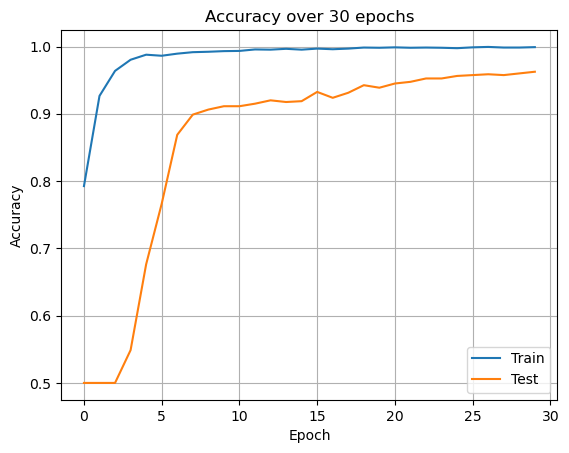

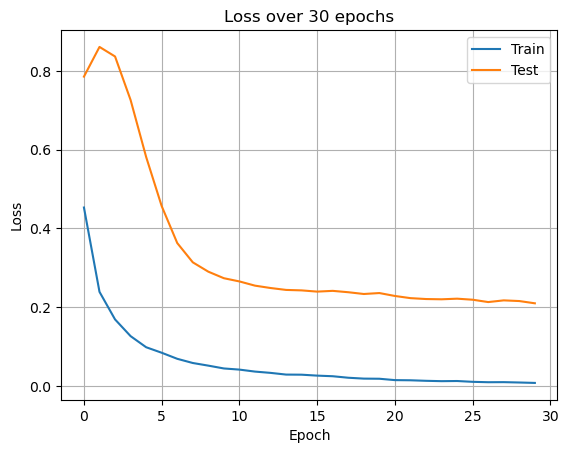

In [174]:
plt.figure(1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title("Accuracy over " + str(EPOCHS) + " epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()


plt.figure(2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.title("Loss over " + str(EPOCHS) + " epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()

plt.show()

In [177]:
model.save('../model/henry_model.h5')

In [175]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image


test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=to_grayscale_then_rgb)
test_batches = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

# for _ in range(5):
#     img, label = eval_generator.next()
#     print(img.shape)   #  (1,256,256,3)
#     plt.imshow(img[0])
#     plt.show()
test_batches.reset()
print(len(test_batches))
x = model.evaluate(test_batches,steps = np.ceil(len(test_batches)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 1452 images belonging to 2 classes.
1452
1452/1452 [==============================] - 6s 4ms/step - loss: 0.3014 - accuracy: 0.8850
Test loss: 0.30139026045799255
Test accuracy: 0.8849862217903137
